In [31]:
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
drive.flush_and_unmount()
drive.mount('/content/gdrive/', force_remount=True)

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/gdrive/


In [14]:
cd gdrive/MyDrive/EBIO5460_sewage_metagenomics/'Group 2: Temporal'/

/content/gdrive/.shortcut-targets-by-id/1XYCCvnClFVxMp4IpwPbhaXS2oawJcGmc/EBIO5460_sewage_metagenomics/Group 2: Temporal


In [18]:
dm = pd.read_csv("bray_curt_dist_m.lsmat",
                 sep="\t", index_col="Unnamed: 0")

In [71]:
index = list(dm.index)
index_location = [x.split("_")[0] for x in index]

within_locations = []
between_locations = [] 

for i in range(dm.shape[0]):
  for j in range(i,dm.shape[0]):
    if i==j:
      pass
    elif index_location[i]==index_location[j]:
      within_locations.append(dm.iloc[i,j])
    elif index_location[i]!=index_location[j]:
      between_locations.append(dm.iloc[i,j])

In [72]:
print(f"{len(within_locations)} within locations",
      f"\n{len(between_locations)} between locations")

915 within locations 
13963 between locations


In [73]:
np.mean(within_locations)

print(f"{np.mean(within_locations)} (std={np.std(within_locations)}) within locations",
      f"\n{np.mean(between_locations)} (std={np.std(between_locations)}) between locations")

0.38548261900849606 (std=0.1039135713846545) within locations 
0.4687548911846917 (std=0.10621284513754091) between locations


In [74]:
from scipy.stats import t, sem

In [75]:
def conf_int(data, conf=0.95):
  a = np.array(data)
  n = len(a)

  m, se = np.mean(a), sem(a)
  
  h = se * t.ppf((1 + conf) / 2., n-1)
  
  return m, m-h, m+h

conf_int_within = conf_int(within_locations)
conf_int_between = conf_int(between_locations)

print(f"Within locations 95% confidence interval: ({conf_int_within[1], conf_int_within[2]}")
print(f"Between locations 95% confidence interval: ({conf_int_between[1], conf_int_between[2]}")

Within locations 95% confidence interval: ((0.3787369854267206, 0.39222825259027155)
Between locations 95% confidence interval: ((0.4669929598988194, 0.47051682247056403)


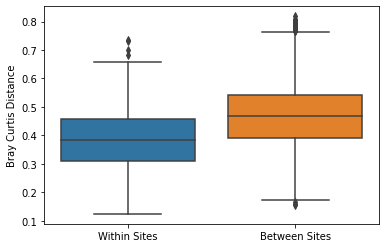

In [81]:
distances = within_locations + between_locations
location = ["Within Sites" for i in within_locations] + ["Between Sites" for i in between_locations]

results = pd.DataFrame(data=[distances, location],
                       index=["Bray Curtis Distance", "Site"]).T

ax = sns.boxplot(data=results,
                y="Bray Curtis Distance",
                x="Site")

ax.set_xlabel("")
plt.show()

(array([  36.,  344., 1335., 2707., 3482., 3384., 2208., 1017.,  322.,
          43.]),
 array([0.12401065, 0.19346443, 0.26291822, 0.33237201, 0.4018258 ,
        0.47127958, 0.54073337, 0.61018716, 0.67964094, 0.74909473,
        0.81854852]),
 <a list of 10 Patch objects>)

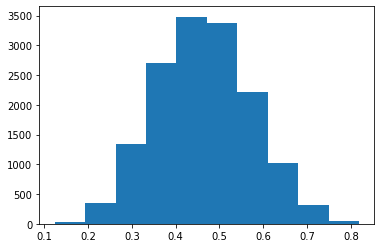

In [77]:
plt.hist(distances)

In [78]:
from scipy.stats import ttest_ind, levene

In [79]:
levene(within_locations, between_locations, 
       center="mean")

LeveneResult(statistic=0.7739544951373895, pvalue=0.3790106819621569)

In [80]:
ttest_ind(within_locations, between_locations)

Ttest_indResult(statistic=-23.003531313079282, pvalue=4.337432118279113e-115)